# AIML Reference-CNN

- <a href = #link_cv2>Basic Image Processing using OpenCV-CV2</a>
    - <a href = #link_skimage>Image Processing with skimage library</a>
- <a href = #link_classification>Image Classification</a>
    - <a href = #link_random>RandomForestClassifier- for number images</a>
    - <a href = #link_Gaussian>RandomForestClassifier- with Gaussian Blurring</a>
    - <a href = #link_tensor>Tensorflow image classification on MNIST image numbers</a>
    - <a href = #link_tensor1>Tensorflow image classification on Monkey Species</a>    
    - <a href = #link_tensor2>Tensorflow image classification on Picture categories</a>
    - <a href = #link_tensor3>Image classification of seeds- project</a>

# <a id = "link_cv2"></a>Basic Image Processing using OpenCV-CV2

In [1]:
import cv2
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from sklearn import svm
from sklearn.model_selection import train_test_split

In [2]:
# Read the image
#image = cv2.imread('test_family_pict.jpg')
image = cv2.imread('greatlearninglogo.jpeg')

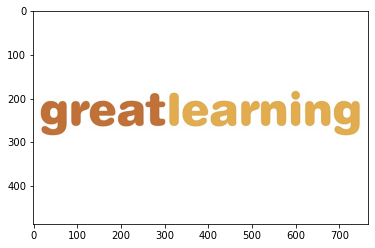

In [3]:
# Display the image.
#cv2_imshow(image)
plt.imshow(image)

In [4]:
print('The shape of image is: ', image.shape)
# Extracting the height and width of an image 
h, w = image.shape[:2] 
# Displaying the height and width 
print("Height = {},  Width = {}".format(h, w)) 

The shape of image is:  (487, 766, 3)
Height = 487,  Width = 766


In [5]:
print('Image Matrix: \n', image)
print(type(image))

Image Matrix: 
 [[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]
<class 'numpy.ndarray'>


In [6]:
# Save the image with new name "new_image.jpg".
cv2.imwrite('new_image.jpg', image)

True

In [7]:
#Image Resizing using OpenCV
half = cv2.resize(image, (110, 110)) # original image was (220, 220), so now the new size given is half i.e. (110, 110) pixels.
bigger = cv2.resize(image, (440, 440)) # original image was (220, 220), so now the new size given is double i.e. (440, 440) pixels.

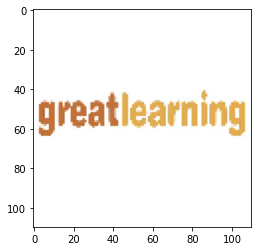

In [8]:
plt.imshow(half)

Bigger Image


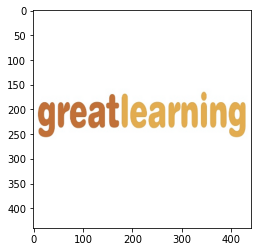

In [9]:
print('Bigger Image')
plt.imshow(bigger)

Original Image:


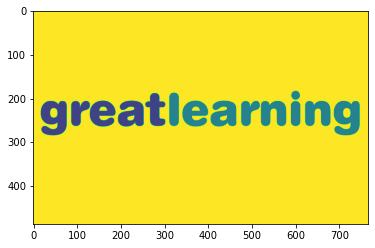

In [10]:
#Grayscaling of Images using OpenCV:
# Convert image to grayscale. The second argument in the following step is cv2.COLOR_BGR2GRAY, which converts colour image to grayscale.
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
print("Original Image:")
plt.imshow(gray)

Output after grayscale conversion:


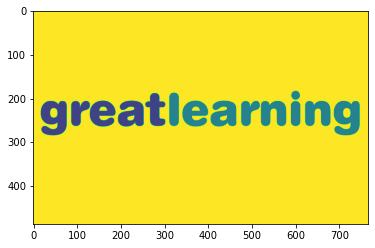

In [11]:
print("Output after grayscale conversion:")
plt.imshow(gray)

Original Image:



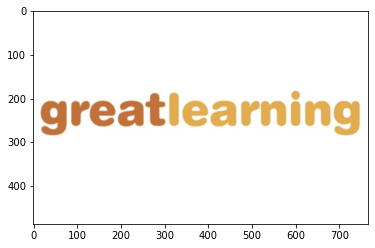

In [12]:
#Image blurring using OpenCV:
gaussian1 = cv2.GaussianBlur(image, (5, 5), 0)
gaussian2 = cv2.GaussianBlur(image, (15, 15), 0)
print('Original Image:\n')
plt.imshow(gaussian1)

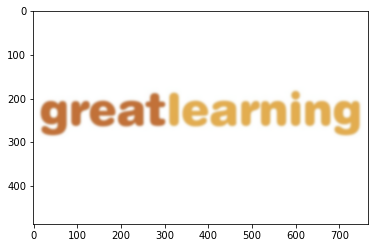

In [13]:
plt.imshow(gaussian2)

In [14]:
file_path = 'greatlearninglogo.jpeg'

In [15]:
img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)

In [16]:
# Let's resize the image to 256x256 for simplicity of a square image
img_resized = cv2.resize(img, (256,256), interpolation = cv2.INTER_AREA)

In [17]:
# Let's create a copy of this resized image called img_aug. We will be saving the convoluted image to this variable
img_aug = img_resized.copy()
img_aug.shape

(256, 256)

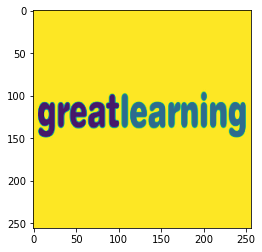

In [18]:
plt.imshow(img_resized)

In [19]:
from IPython.display import Image
Image(url='https://media.giphy.com/media/i4NjAwytgIRDW/giphy.gif')

## <a id = "link_skimage"></a>Image Processing with skimage library

In [20]:
from skimage import data, io                     # Import skimage library (data - Test images and example data.
                                                 #                          io - Reading, saving, and displaying images.) 

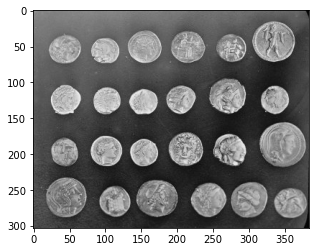

In [21]:
# skimage.data has a lot of sample images to play around with
image = data.coins()                              # Images of Greek coins from Pompeii.

plt.imshow(image, cmap='gray')

**Find the 5X5 Guassian Blur kernel with sigma = 1.0 and convolve the above image with that kernel**

In [22]:
from scipy.signal import convolve2d               # Convolve two 2-dimensional arrays.

In [23]:
kernel = np.array([[0.003765,0.015019,0.023792,0.015019,0.003765],
                   [0.015019,0.059912,0.094907,0.059912,0.015019],
                   [0.023792,0.094907,0.150342,0.094907,0.023792],
                   [0.015019,0.059912,0.094907,0.059912,0.015019],
                   [0.003765,0.015019,0.023792,0.015019,0.003765]])

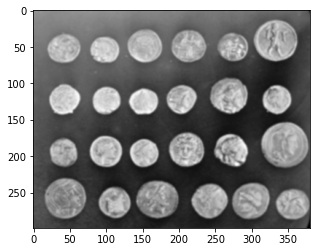

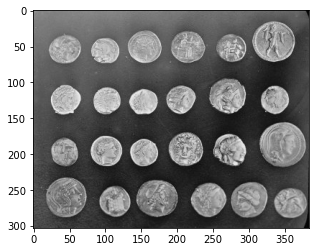

In [24]:
blurred_image = convolve2d(image, kernel, mode = 'valid')    # Convolution of image and kernel
plt.imshow(blurred_image,cmap='gray')                        # show the image after convolution (after blurring)
plt.show()
plt.imshow(image,cmap='gray')

# <a id = "link_classification"></a>Image Classification

In [25]:
data = pd.read_csv('number_images.csv')    # Load the dataset by providing the path to the file.

In [26]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
data.shape

(10008, 785)

In [28]:
# The labels for images.
y = data["label"]

In [29]:
print(y[0])               # Label for 1st image.
print(y[2000])   

1
3


In [30]:
# Drop 'label' column.
X = data.drop(labels = ["label"], axis = 1)

/root/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


5    1002
7    1001
6    1001
3    1001
9    1001
1    1001
8    1001
4    1000
2    1000
0    1000
Name: label, dtype: int64

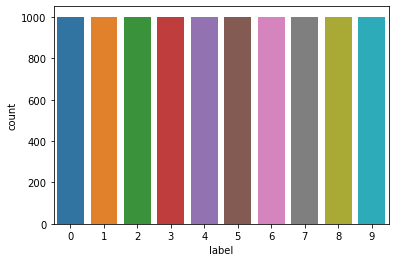

In [31]:
g = sns.countplot(y)
y.value_counts()

In [32]:
# Check the data
X.isnull().sum()

pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 784, dtype: int64

In [33]:
# Perform a grayscale normalization to reduce the effect of illumination's differences.
X = X.astype('float32') / 255.0

In [34]:
X = X.values # Convert the features (pixel values) to numpy array to feed into the supervised learning model.
y = y.values # Convert the labels to numpy array to feed into the supervised learning model.

In [35]:
# Split data into test and train to build the model.
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=7)

In [36]:
type(X_train) # As we can see that the data to be fed into model is of the type numpy array.

numpy.ndarray

Text(0.5, 1.0, '0')

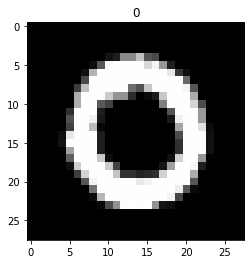

In [37]:
# Viewing an Image
i=1
img = X[i]
img = img.reshape((28,28))
plt.imshow(img, cmap='gray')
plt.title(y[i])

In [38]:
X.reshape((10008, 28, 28))

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

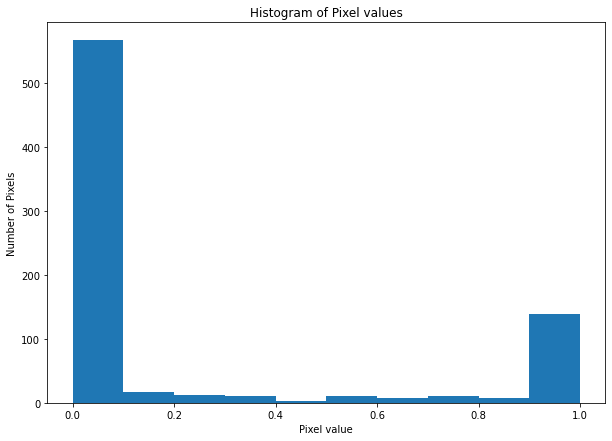

In [39]:
# Examining the Pixel Values
plt.figure(figsize=(10,7), edgecolor='blue')

n, bins, patches = plt.hist(X[1], bins=10, range=(0.0, 1.0))
plt.xlabel('Pixel value')
plt.ylabel('Number of Pixels')
plt.title('Histogram of Pixel values')
plt.show()

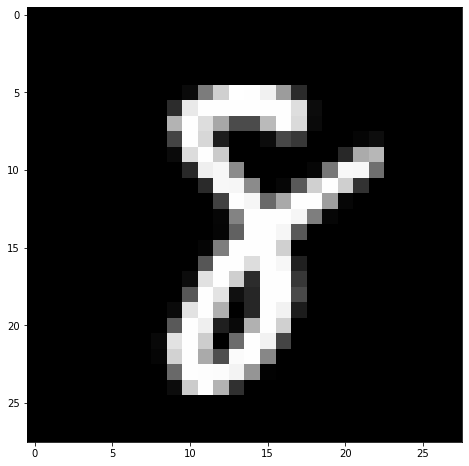

In [40]:
i=300                            
img = X[i]                        
img = img.reshape((28,28))

plt.figure(figsize = (8,8))        
plt.imshow(img, cmap='gray');

In [41]:
X[i].shape

(784,)

## <a id = "link_random"></a>RandomForestClassifier- for number images

In [42]:
from sklearn.ensemble import RandomForestClassifier
# random forest model creation
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [43]:
clf.score(X_test, y_test)

0.9456434852118305

In [44]:
y_pred = clf.predict(X_test)

Text(0.5, 1.0, '1')

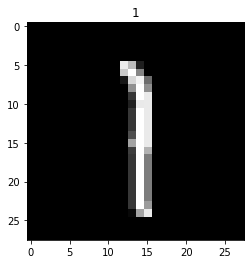

In [45]:
img = X_test[i]
img = img.reshape((28,28))
plt.imshow(img, cmap='gray')
plt.title(y_pred[i])

Text(0.5, 1.0, '0')

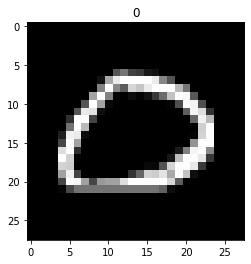

In [46]:
img = X_test[25]
img = img.reshape((28,28))
plt.imshow(img, cmap='gray')
plt.title(y_pred[25])

In [47]:
from sklearn.metrics import classification_report, confusion_matrix

In [48]:
print("=== Confusion Matrix ===")
cm = confusion_matrix(y_test, y_pred)
print(cm)

=== Confusion Matrix ===
[[227   0   0   0   1   0   2   1   2   0]
 [  0 225   2   1   1   3   1   1   1   0]
 [  2   1 238   2   1   0   0   1   0   1]
 [  3   0   5 244   0   5   0   1   5   1]
 [  0   1   1   0 256   0   1   0   1   5]
 [  3   1   1   4   0 236   2   0   2   0]
 [  1   0   1   0   2   3 245   0   1   0]
 [  1   2   5   2   4   0   0 227   2   7]
 [  1   1   1   4   1   2   4   0 224   3]
 [  7   1   2   1   5   1   0   4   1 244]]


<AxesSubplot:>

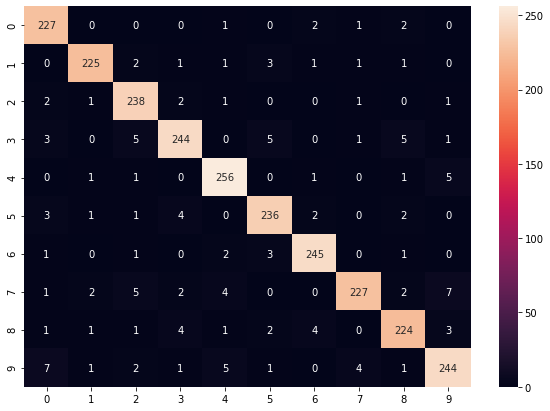

In [49]:
df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                     columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='d')

In [50]:
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       233
           1       0.97      0.96      0.96       235
           2       0.93      0.97      0.95       246
           3       0.95      0.92      0.93       264
           4       0.94      0.97      0.96       265
           5       0.94      0.95      0.95       249
           6       0.96      0.97      0.96       253
           7       0.97      0.91      0.94       250
           8       0.94      0.93      0.93       241
           9       0.93      0.92      0.93       266

    accuracy                           0.95      2502
   macro avg       0.95      0.95      0.95      2502
weighted avg       0.95      0.95      0.95      2502



## <a id = "link_Gaussian"></a>RandomForestClassifier- with Gaussian Blurring

In [51]:
print(len(X)) # Check the number of rows in the dataset.
print(X.shape) # The shape of dataset tells us that there are 10008 numbers, each of which has 784 pixels. (It's the shape of the numpy array)

10008
(10008, 784)


In [52]:
# Now we create an empty numpy array, which will be used to store the new values after applying Gaussian Blurring filter to the original image.
new_x = np.empty((10008, 28, 28)) 

In [53]:
new_x.shape

(10008, 28, 28)

In [54]:
# We can see that each digit is made of 784 pixels.
X[0].shape 

(784,)

In [55]:
# In the following step, we iterate through each row, and convert the 1-D array of 784 pixels to an array of 28x28 pixels 2-D array. 
for idx, line in enumerate(X):
  new_x[idx] = line.reshape((28, 28))

In [56]:
new_x.shape

(10008, 28, 28)

In [57]:
# Now we apply the gaussian blur to each 28x28 pixels array (image) to reduce the noise in the image
for idx, img in enumerate(new_x):
  new_x[idx] = cv2.GaussianBlur(img, (5, 5), 0)

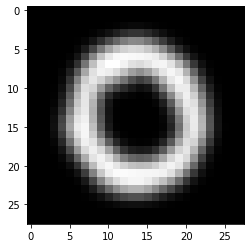

In [58]:
# Plot the de-noised image generated by applying Gaussian blur.
plt.imshow(new_x[1], cmap='gray')
#plt.title(y[i])

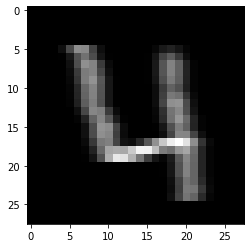

In [59]:
X_new = np.apply_along_axis(
    lambda img: cv2.GaussianBlur(img, (5, 5), 0), 
    -1, 
    X.reshape((-1, 28, 28))
)
X_new = X_new.reshape((-1, 28, 28))
plt.imshow(X_new[3], cmap='gray')

In [60]:
# Now we create another empty numpy array of 10008 rows and 784 columns shape, to store the pixel values, which are obtained by applying the Gaussian Blur.
# The new array is necessary as we have to feed the data in the model in this original format.
another_x = np.empty((10008, 784))

In [61]:
# Append/Set the values of the another array to be fed into model equal to the flattened array, which has the shape of 784 pixels (1-D)
for idx, img in enumerate(new_x):
  another_x[idx] = img.flatten()

(array([478.,  40.,  36.,  25.,  27.,  20.,  27.,  33.,  46.,  52.]),
 array([0.        , 0.09641544, 0.19283088, 0.28924632, 0.38566176,
        0.48207721, 0.57849265, 0.67490809, 0.77132353, 0.86773897,
        0.96415441]),
 <BarContainer object of 10 artists>)

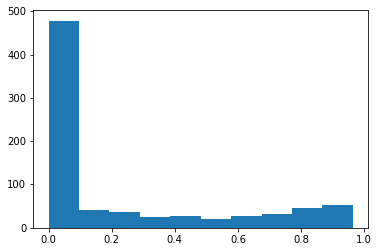

In [62]:
plt.hist(another_x[1])

In [63]:
# Split the new data (another_x) and y into train and test set.
# Note that we used the same y (labels) as before, as the labels have values between 0 to 9. So, there is no connection between the Gaussian blur and the...
# ...labels, so we can use it as it is.
X_train, X_test, y_train, y_test = train_test_split(another_x, y, train_size=0.75, random_state=0)

In [64]:
from sklearn.ensemble import RandomForestClassifier
# random forest model creation
clf_gaus = RandomForestClassifier(random_state=7)
clf_gaus.fit(X_train, y_train)

RandomForestClassifier(random_state=7)

In [65]:
clf_gaus.score(X_test, y_test)

0.9412470023980816

In [66]:
y_pred = clf_gaus.predict(X_test)

In [67]:
print("=== Confusion Matrix ===")
cm = confusion_matrix(y_test, y_pred)
print(cm)

=== Confusion Matrix ===
[[234   0   2   0   1   0   3   0   0   1]
 [  0 253   2   1   0   0   3   0   0   0]
 [  2   1 208   1   0   0   0   4   4   1]
 [  0   2   9 244   0   3   2   1   6   5]
 [  0   0   0   1 224   1   2   0   0  13]
 [  0   0   2   5   0 252   4   0   3   3]
 [  2   0   0   0   0   3 244   0   3   0]
 [  0   0   3   0   1   0   0 248   1   5]
 [  1   3   1   5   2   1   4   0 229   3]
 [  2   0   2   5   6   1   0   1   4 219]]


## <a id = "link_tensor"></a>Tensorflow image classification on MNIST image numbers

In [68]:
import tensorflow
tensorflow.__version__

'2.2.0'

In [69]:
#load MNIST dataset
from tensorflow.keras.datasets import mnist

In [70]:
# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
#X_train and X_test contain greyscale RGB codes (from 0 to 255) while y_train and y_test contains labels from 0 to 9 which represents which number they actually are.

Label: 0


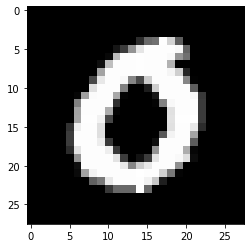

In [71]:
print("Label: {}".format(y_train[8000]))
plt.imshow(X_train[8000], cmap='gray')

In [72]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


Reshape train and test sets into compatible shapes
- Sequential model in tensorflow.keras expects data to be in the format (n_e, n_h, n_w, n_c)
- n_e= number of examples, n_h = height, n_w = width, n_c = number of channels
- do not reshape labels

In [73]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [74]:
# Normalize teh data
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

In [75]:
print("X_train shape:", X_train.shape)
print("Images in X_train:", X_train.shape[0])
print("Images in X_test:", X_test.shape[0])
print("Max value in X_train:", X_train.max())
print("Min value in X_train:", X_train.min())

X_train shape: (60000, 28, 28, 1)
Images in X_train: 60000
Images in X_test: 10000
Max value in X_train: 1.0
Min value in X_train: 0.0


One-hot encode the class vector
- convert class vectors (integers) to binary class matrix
- convert y_train and y_test
- number of classes: 10
- we are doing this to use categorical_crossentropy as loss

In [76]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

print("Shape of y_train:", y_train.shape)
print("One value of y_train:", y_train[0])

Shape of y_train: (60000, 10)
One value of y_train: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [77]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=3, activation="relu", input_shape=(28, 28, 1)))
model.add(Conv2D(filters=32, kernel_size=3, activation="relu"))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [78]:
# Compile the model
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

# Fit the model
# model.fit( x=X_train, y=y_train, batch_size=32, epochs=10, validation_split = 0.3)
model.fit( x=X_train, y=y_train, batch_size=32, epochs=1, validation_split = 0.3)

1313/1313 [==============================] - 53s 41ms/step - loss: 0.1274 - accuracy: 0.9602 - val_loss: 0.0668 - val_accuracy: 0.9797


In [79]:
# Final loss and accuracy
model.evaluate(X_test, y_test)

313/313 [==============================] - 4s 11ms/step - loss: 0.0584 - accuracy: 0.9814


[0.05842228978872299, 0.9814000129699707]

## tensorflow model 2: Vanilla CNN + Pooling + Dropout

In [80]:
from tensorflow.keras.layers import MaxPooling2D, Dropout
# Initialize the model
model = Sequential()

# Add a Convolutional Layer with 32 filters of size 3X3 and activation function as 'relu' 
model.add(Conv2D(filters=32, kernel_size=3, activation="relu", input_shape=(28, 28, 1)))

# Add a Convolutional Layer with 32 filters of size 3X3 and activation function as 'relu' 
model.add(Conv2D(filters=32, kernel_size=3, activation="relu"))

# Add a MaxPooling Layer of size 2X2 
model.add(MaxPooling2D(pool_size=(2, 2)))

# Apply Dropout with 0.2 probability 
model.add(Dropout(rate=0.2))

# Flatten the layer
model.add(Flatten())

# Add Fully Connected Layer with 128 units and activation function as 'relu'
model.add(Dense(128, activation="relu"))

#Add Fully Connected Layer with 10 units and activation function as 'softmax'
model.add(Dense(10, activation="softmax"))

In [81]:
# Compile the model
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

# Use earlystopping
callback = tensorflow.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2, min_delta=0.01)

# Fit the model
# model.fit(x=X_train, y=y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test), callbacks=[callback])
model.fit(x=X_train, y=y_train, batch_size=32, epochs=1, validation_data=(X_test, y_test), callbacks=[callback])

1875/1875 [==============================] - 65s 35ms/step - loss: 0.1331 - accuracy: 0.9596 - val_loss: 0.0460 - val_accuracy: 0.9853


In [82]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 5s 15ms/step - loss: 0.0460 - accuracy: 0.9853


[0.04595082998275757, 0.9853000044822693]

Predicted label: 6
Softmax Outputs: [[2.1325619e-05 2.2292433e-07 1.0374544e-06 3.1263364e-05 1.4211365e-06
  2.4110157e-04 9.9962091e-01 1.1236344e-05 7.1270704e-05 1.6825268e-07]]
1.0


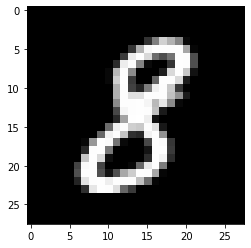

In [83]:
plt.imshow(X_test[110].reshape(28, 28), cmap='gray')
y_pred = model.predict(X_test[11].reshape(1, 28, 28, 1))
print("Predicted label:", y_pred.argmax())
print("Softmax Outputs:", y_pred)
print(y_pred.sum())

## <a id = "link_tensor1"></a>Tensorflow image classification on Monkey Species

In [84]:
# the zip file contans only few images per class to limit teh size of the file
##images_path = "monkeys_dataset2.zip"

In [85]:
# Extract the files from dataset, as the dataset is as zip file.
##from zipfile import ZipFile
##with ZipFile(images_path, 'r') as zip:
#  zip.extractall()

In [86]:
!ls

01 AIML Reference-ANN and Tesnorflow.ipynb  greatlearninglogo.jpeg
01 AIML Reference-CNN.ipynb		    images.npy
bank.csv				    Labels.csv
Celsius to Fahrenheit.csv		    new_image.jpg
creditcard.csv				    number_images.csv
dataset_cats_dogs			    usedcars.csv
dataset_monkeys


In [87]:
# Initialising the CNN classifier
classifier = Sequential()

# Add a Convolution layer with 32 kernels of 3X3 shape with activation function ReLU
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu', padding = 'same'))

# Add a Max Pooling layer of size 2X2
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Add another Convolution layer with 32 kernels of 3X3 shape with activation function ReLU
classifier.add(Conv2D(32, (3, 3), activation = 'relu', padding = 'same'))

# Adding another pooling layer
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Add another Convolution layer with 32 kernels of 3X3 shape with activation function ReLU
classifier.add(Conv2D(32, (3, 3), activation = 'relu', padding = 'valid'))

# Adding another pooling layer
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Flattening the layer before fully connected layers
classifier.add(Flatten())

# Adding a fully connected layer with 512 neurons
classifier.add(Dense(units = 512, activation = 'relu'))

# Adding dropout with probability 0.5
classifier.add(Dropout(0.5))


# Adding a fully connected layer with 128 neurons
classifier.add(Dense(units = 128, activation = 'relu'))


# The final output layer with 10 neurons to predict the categorical classifcation
classifier.add(Dense(units = 10, activation = 'softmax'))

In [88]:
''' Compile model (using the efficient Adam gradient descent optimization algorithm
    with a logarithmic loss function, which is called “categorical_crossentropy” in Keras.)'''
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

**Use ImageDataGenerator to create a test and training set data generators and use fit_generator() function to train the model**

ImageDataGenerator is a powerful preprocessing utility to generate training and testing data with common data augmentation techniques. It can also be used to
generate training data from Images stored in hierarchical directory structures

In [89]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator    # Generate batches of tensor image data with real-time data augmentation.


# Create data generator for training data with data augmentation and normalizing all
# values by 255
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)


test_datagen = ImageDataGenerator(rescale = 1./255)

# Setting training data generator's source directory ("." means the current directory. ("./dataset" means that dataset is inside current directory))
# Setting the target size to resize all the images to (64,64) as the model input layer expects 64X64 images

# original batch_size=32
training_set = train_datagen.flow_from_directory('./dataset_monkeys/train',
                                                 target_size = (64, 64),
                                                 batch_size = 1,
                                                 class_mode = 'categorical')
# original batch_size=32
# "./dataset/test" means that test is inside dataset inside current directory.
# Setting testing data generator's source directory
test_set = test_datagen.flow_from_directory('./dataset_monkeys/test',
                                            target_size = (64, 64),
                                            batch_size = 1,
                                            class_mode = 'categorical')

# original  steps_per_epoch = int(1098/32)
# There are 1098 training images and 272 test images in total
classifier.fit(training_set,
                         steps_per_epoch = int(32/32),
                         epochs = 10,
                         validation_data = test_set,
                         validation_steps = int(272/32))

Found 30 images belonging to 10 classes.
Found 30 images belonging to 10 classes.
Epoch 1/10
1/1 [==============================] - 1s 615ms/step - loss: 2.0249 - accuracy: 1.0000 - val_loss: 2.3485 - val_accuracy: 0.1250
Epoch 2/10
1/1 [==============================] - 0s 241ms/step - loss: 1.8849 - accuracy: 0.0000e+00 - val_loss: 2.4680 - val_accuracy: 0.1250
Epoch 3/10
1/1 [==============================] - 1s 529ms/step - loss: 3.1639 - accuracy: 0.0000e+00 - val_loss: 2.7619 - val_accuracy: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 0s 452ms/step - loss: 2.8032 - accuracy: 0.0000e+00 - val_loss: 2.6121 - val_accuracy: 0.1250
Epoch 5/10
1/1 [==============================] - 0s 288ms/step - loss: 2.8032 - accuracy: 0.0000e+00 - val_loss: 2.2922 - val_accuracy: 0.0000e+00
Epoch 6/10
1/1 [==============================] - 1s 599ms/step - loss: 2.5823 - accuracy: 0.0000e+00 - val_loss: 2.1529 - val_accuracy: 0.3750
Epoch 7/10
1/1 [==============================] - 

## <a id = "link_tensor2"></a>Tensorflow image classification on Picture categories

## <a id = "link_tensor3"></a>Image classification of seeds- great learning project

In [90]:
trainImg = np.load ('images.npy')
trainlabel = pd.read_csv('Labels.csv')

In [91]:
trainImg.shape

(4750, 128, 128, 3)

In [92]:
trainlabel.head()

,Label
0,Small-flowered Cranesbill
1,Small-flowered Cranesbill
2,Small-flowered Cranesbill
3,Small-flowered Cranesbill
4,Small-flowered Cranesbill


In [93]:
trainlabel.groupby("Label").agg({'Label': 'count'})

,Label
Label,
Black-grass,263
Charlock,390
Cleavers,287
Common Chickweed,611
Common wheat,221
Fat Hen,475
Loose Silky-bent,654
Maize,221
Scentless Mayweed,516


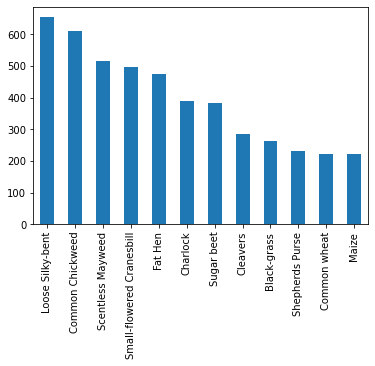

In [94]:
trainlabel['Label'].value_counts().plot(kind='bar')
plt.show()

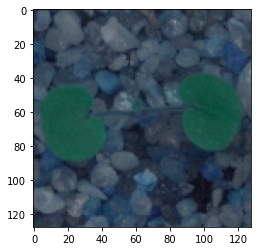

In [95]:
plt.imshow(trainImg[0])

In [96]:
trainlabel.loc[0]

Label    Small-flowered Cranesbill
Name: 0, dtype: object

Original Image:



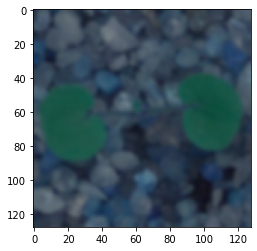

In [97]:
#Image blurring using OpenCV:
gaussian1 = cv2.GaussianBlur(trainImg[0], (5, 5), 0)
gaussian2 = cv2.GaussianBlur(trainImg[0], (15, 15), 0)
print('Original Image:\n')
plt.imshow(gaussian1)

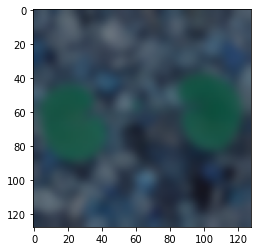

In [98]:
plt.imshow(gaussian2)

In [99]:
X = trainImg

In [100]:
X.shape

(4750, 128, 128, 3)

In [101]:
# Normalize the data
X = X.astype('float32')
X /= 255

In [102]:
print("X shape:", X.shape)
print("Images in X:", X.shape[0])
print("Max value in X:", X.max())
print("Min value in X:", X.min())

X shape: (4750, 128, 128, 3)
Images in X: 4750
Max value in X: 1.0
Min value in X: 0.0


In [103]:
y = trainlabel["Label"]

In [104]:
# Split data into test and train to build the model.
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=7)

In [105]:
X_train.shape

(3562, 128, 128, 3)

In [106]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3562, 128, 128, 3)
(3562,)
(1188, 128, 128, 3)
(1188,)


In [107]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()
y_train_original = y_train
y_test_original = y_test
y_train = enc.fit_transform(y_train)
y_test = enc.fit_transform(y_test)

In [108]:
y_train[0]

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [109]:
print("X_train shape:", X_train.shape)
print("Images in X_train:", X_train.shape[0])
print("Images in X_test:", X_test.shape[0])
print("Max value in X_train:", X_train.max())
print("Min value in X_train:", X_train.min())

X_train shape: (3562, 128, 128, 3)
Images in X_train: 3562
Images in X_test: 1188
Max value in X_train: 1.0
Min value in X_train: 0.0


In [110]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense,BatchNormalization,MaxPooling2D,Dropout

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=3, activation="relu", input_shape=(128, 128, 3)))


model.add(BatchNormalization())
model.add(Conv2D(64, (5, 5), padding='same', activation="relu"))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(filters=32, kernel_size=3, activation="relu"))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(256, activation="relu"))
model.add(Dense(12, activation="softmax"))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 126, 126, 32)      128       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 126, 126, 64)      51264     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 63, 63, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 63, 63, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 61, 61, 32)        18464     
_________________________________________________________________
flatten_3 (Flatten)          (None, 119072)           

In [111]:
y_train.shape

(3562, 12)

In [112]:
# Compile the model
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

# Fit the model
model.fit( x=X_train, y=y_train, batch_size=128, epochs=2, validation_split = 0.6)

Epoch 1/2
12/12 [==============================] - 114s 9s/step - loss: 4.8123 - accuracy: 0.1096 - val_loss: 2.4844 - val_accuracy: 0.1417
Epoch 2/2
12/12 [==============================] - 114s 10s/step - loss: 2.4840 - accuracy: 0.1060 - val_loss: 2.4797 - val_accuracy: 0.1417


In [113]:
y_pred = model.predict(X_test)

In [114]:
y_pred_cat = enc.inverse_transform(y_pred)

In [115]:
df_pred = pd.DataFrame({'Actual': y_test_original, 'Predicted': y_pred_cat})
df_pred.head(20)

,Actual,Predicted
3510,Sugar beet,Loose Silky-bent
1524,Common Chickweed,Loose Silky-bent
2921,Scentless Mayweed,Loose Silky-bent
2114,Charlock,Loose Silky-bent
687,Fat Hen,Loose Silky-bent
474,Small-flowered Cranesbill,Loose Silky-bent
1832,Common Chickweed,Loose Silky-bent
3865,Black-grass,Loose Silky-bent
2816,Scentless Mayweed,Loose Silky-bent
4071,Black-grass,Loose Silky-bent


Text(0.5, 1.0, 'Actutal:Small-flowered Cranesbill- Predicted:Loose Silky-bent')

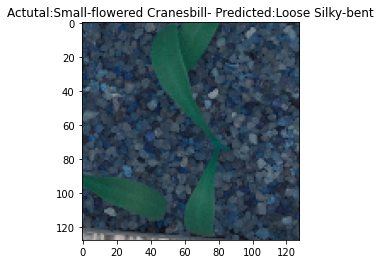

In [116]:
img = X_test[0]
img = img.reshape((128,128,3))
plt.imshow(img, cmap='gray')
plt.title('Actutal:'+y_test_original[0] +'- Predicted:'+y_pred_cat[0])

In [117]:
from sklearn.metrics import classification_report, confusion_matrix

In [118]:
print("=== Confusion Matrix ===")
cm = confusion_matrix(y_test_original, y_pred_cat)
print(cm)

=== Confusion Matrix ===
[[  0   0   0   0   0   0  72   0   0   0   0   0]
 [  0   0   0   0   0   0 102   0   0   0   0   0]
 [  0   0   0   0   0   0  66   0   0   0   0   0]
 [  0   0   0   0   0   0 143   0   0   0   0   0]
 [  0   0   0   0   0   0  56   0   0   0   0   0]
 [  0   0   0   0   0   0 124   0   0   0   0   0]
 [  0   0   0   0   0   0 153   0   0   0   0   0]
 [  0   0   0   0   0   0  58   0   0   0   0   0]
 [  0   0   0   0   0   0 140   0   0   0   0   0]
 [  0   0   0   0   0   0  57   0   0   0   0   0]
 [  0   0   0   0   0   0 119   0   0   0   0   0]
 [  0   0   0   0   0   0  98   0   0   0   0   0]]


<AxesSubplot:>

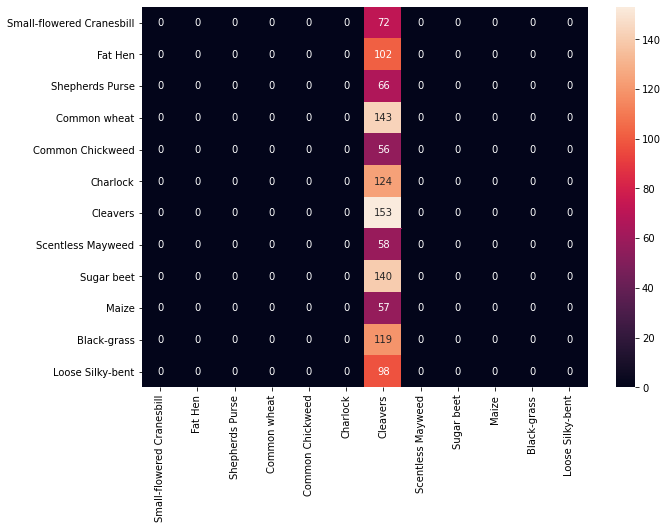

In [119]:
df_cm = pd.DataFrame(cm, index = [i for i in trainlabel.Label.unique()],
                     columns = [i for i in trainlabel.Label.unique()])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='d')

In [120]:
from sklearn.metrics import accuracy_score

In [121]:
accuracy = accuracy_score(y_test_original, y_pred_cat)
accuracy

0.12878787878787878

## Mnist imgae classification using Tensorflow- example 2

In [122]:
import numpy as np
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
# Using Tensorflow Keras instead of the original Keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense


In [123]:
(xtrain,ytrain),(xtest,ytest)=mnist.load_data()

In [124]:
xtrain.shape


(60000, 28, 28)

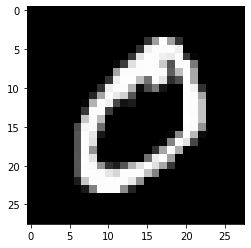

In [125]:
plt.imshow(xtrain[1,:,:],cmap='gray')

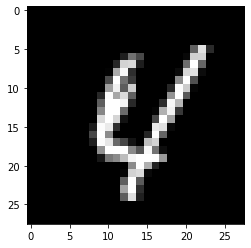

In [126]:
plt.imshow(xtrain[700,:,:],cmap='gray')

In [127]:
ytrain[1]

0

In [128]:
ytrain[:50]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0,
       9, 1, 1, 2, 4, 3, 2, 7, 3, 8, 6, 9, 0, 5, 6, 0, 7, 6, 1, 8, 7, 9,
       3, 9, 8, 5, 9, 3], dtype=uint8)

In [129]:
L=pd.DataFrame(ytrain)
L[0].value_counts()

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: 0, dtype: int64

In [130]:
#Represent Training & Testing samples suitable for #tensorflow backend
x_train=xtrain.reshape(xtrain.shape[0],784).astype('float32')
x_test=xtest.reshape(xtest.shape[0],784).astype('float32')

In [131]:
x_test.shape

(10000, 784)

In [132]:
x_train/=255
x_test/=255

In [133]:
from tensorflow import keras

y_train = keras.utils.to_categorical(ytrain, 10)
y_test = keras.utils.to_categorical(ytest, 10)

In [134]:
# Initialize the constructor
model = Sequential()

In [135]:
# Define model architecture

model.add(Dense(784,activation='relu'))
model.add(Dense(100, activation ='relu'))
model.add(Dense(10,activation='softmax'))

In [136]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [137]:
model.fit(x_train, y_train, epochs=10, batch_size=256, verbose=1) 

Epoch 1/10
235/235 [==============================] - 3s 14ms/step - loss: 0.2748 - accuracy: 0.9219
Epoch 2/10
235/235 [==============================] - 4s 17ms/step - loss: 0.0993 - accuracy: 0.9709
Epoch 3/10
235/235 [==============================] - 3s 14ms/step - loss: 0.0607 - accuracy: 0.9815
Epoch 4/10
235/235 [==============================] - 3s 13ms/step - loss: 0.0409 - accuracy: 0.9873
Epoch 5/10
235/235 [==============================] - 3s 13ms/step - loss: 0.0316 - accuracy: 0.9902
Epoch 6/10
235/235 [==============================] - 3s 13ms/step - loss: 0.0218 - accuracy: 0.9934
Epoch 7/10
235/235 [==============================] - 4s 15ms/step - loss: 0.0162 - accuracy: 0.9954
Epoch 8/10
235/235 [==============================] - 3s 13ms/step - loss: 0.0121 - accuracy: 0.9966
Epoch 9/10
235/235 [==============================] - 3s 13ms/step - loss: 0.0081 - accuracy: 0.9980
Epoch 10/10
235/235 [==============================] - 3s 13ms/step - loss: 0.0064 - accura

In [138]:
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print('Accuracy: %.3f'  % acc)
print('Loss: %.3f' % loss)

Accuracy: 0.983
Loss: 0.063


In [139]:
y_predict = model.predict(x_test)

In [140]:
y_predict[0]

array([7.7409357e-10, 2.2132095e-10, 3.2747099e-08, 7.0735020e-08,
       5.7339580e-12, 3.3704553e-11, 1.5914990e-14, 9.9999988e-01,
       4.3077242e-10, 1.0773401e-08], dtype=float32)

In [141]:
np.argmax(y_predict[0])

7

In [142]:
y_pred = []
for val in y_predict:
    y_pred.append(np.argmax(val))
#print(y_pred)    
#convert 0 1 to 1 and 1 0 as 0
cm = metrics.confusion_matrix(ytest,y_pred)
print(cm)

[[ 971    1    1    0    2    1    1    1    2    0]
 [   0 1125    2    0    0    0    3    1    4    0]
 [   1    0 1017    2    1    0    0    4    6    1]
 [   2    0    5  985    0    9    1    4    3    1]
 [   1    0    3    1  965    0    3    1    1    7]
 [   2    0    0    3    1  881    3    1    1    0]
 [   1    2    1    1    8    4  941    0    0    0]
 [   0    1    7    2    1    0    0 1012    2    3]
 [   4    1    3    2    3    4    4    3  948    2]
 [   2    3    2    3    8    3    0    6    2  980]]


In [143]:
cr=metrics.classification_report(ytest,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.98      1032
           3       0.99      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.99      0.98       892
           6       0.98      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.97      0.98       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



<AxesSubplot:>

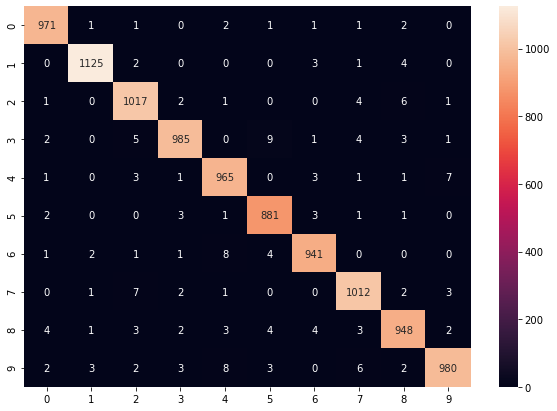

In [144]:
df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                     columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='d')

## Image classification using tensorflow- cat/dog pictures

In [146]:
# Part 1 - Data Preprocessing

# Preprocessing the Training set
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('dataset_cats_dogs/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 208 images belonging to 2 classes.


In [148]:
# Preprocessing the Test set
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('dataset_cats_dogs/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')


Found 64 images belonging to 2 classes.


In [150]:
import tensorflow as tf
# Initialising the CNN
cnn = tf.keras.models.Sequential()

In [151]:
# Step 1 - Convolution
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

In [152]:
# Step 2 - Pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [153]:
# Adding a second convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [154]:
# Step 3 - Flattening
cnn.add(tf.keras.layers.Flatten())

In [155]:
# Step 4 - Full Connection
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [156]:
# Step 5 - Output Layer
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [157]:
# Compiling the CNN
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [158]:
# Training the CNN on the Training set and evaluating it on the Test set
cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

Epoch 1/25
7/7 [==============================] - 2s 246ms/step - loss: 0.8946 - accuracy: 0.4904 - val_loss: 0.6970 - val_accuracy: 0.5000
Epoch 2/25
7/7 [==============================] - 1s 181ms/step - loss: 0.6924 - accuracy: 0.5385 - val_loss: 0.6988 - val_accuracy: 0.5000
Epoch 3/25
7/7 [==============================] - 1s 174ms/step - loss: 0.6860 - accuracy: 0.5385 - val_loss: 0.6966 - val_accuracy: 0.5000
Epoch 4/25
7/7 [==============================] - 1s 203ms/step - loss: 0.6839 - accuracy: 0.5385 - val_loss: 0.6978 - val_accuracy: 0.5000
Epoch 5/25
7/7 [==============================] - 1s 192ms/step - loss: 0.6790 - accuracy: 0.5385 - val_loss: 0.7001 - val_accuracy: 0.5000
Epoch 6/25
7/7 [==============================] - 1s 200ms/step - loss: 0.6784 - accuracy: 0.5385 - val_loss: 0.7028 - val_accuracy: 0.5000
Epoch 7/25
7/7 [==============================] - 1s 186ms/step - loss: 0.6725 - accuracy: 0.5385 - val_loss: 0.6948 - val_accuracy: 0.5312
Epoch 8/25
7/7 [====

In [160]:
# Making a single prediction- for cat

import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('dataset_cats_dogs/cat.4001.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'
print(prediction)

dog


In [161]:
# Making a single prediction- for dog

test_image = image.load_img('dataset_cats_dogs/dog.4094.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'
print(prediction)

dog
